In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

True

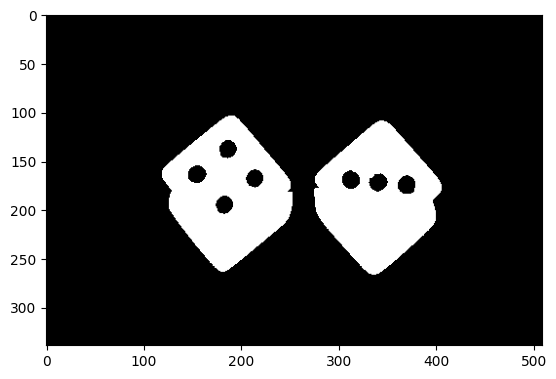

In [37]:
org_img = cv.imread('1.jpg', 0)
img = org_img
# clahe = cv.createCLAHE(2, (10,10))
# img = clahe.apply(org_img)
# img = cv.equalizeHist(img)
_, img = cv.threshold(img, 200, 255, cv.THRESH_BINARY)


img = cv.erode(img, np.ones((4,4)), iterations=1)
# img = cv.dilate(img, np.ones((4,4)), iterations=1)

# for i in range(4,height-4):
#     for j in range(4, width-4):
#         zone = img[i-4:i+5, j-4:j+5]
#         img[i][j]= int(np.mean(zone))

# img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 5)
img = 255 - img
height, width = img.shape
# img = cv.dilate(img, np.ones((3,3)), iterations=1)
# img = cv.dilate(img, np.ones((1,2)), iterations=1)

# for i in range(1,height-1):
#     for j in range(1, width-1):
#         zone = img[i-1:i+2, j-1:j+2]
#         img[i][j]= int(np.median(zone))
# img = cv.morphologyEx(img, cv.MORPH_CLOSE, np.ones((4,4)), iterations=1)

plt.imshow(img, 'gray')
cv.imwrite('11.jpg', img)

In [38]:
contours, h = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
hierarchy = h[0]

3
4


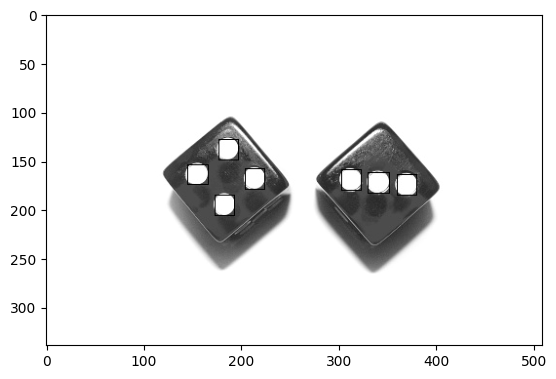

In [39]:
parents=[hie[3] for hie in hierarchy]
for i in range(len(parents)):
    if parents[i] != -1:
        x, y, w, h = cv.boundingRect(contours[i])
        cv.rectangle(org_img, (x,y), (x+w,h+y), (0,0,0), 1)
plt.imshow(org_img, 'gray')
cv.imwrite('riz.jpg', org_img)

dices=[]
for p in parents:
    if p != -1 and p not in dices:
        dices.append(p)
        
for dice in dices:
    print(parents.count(dice))